In [6]:
#Importing the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Customer ID is unique to each customer,difficult to encode hence eliminating

data=df.drop(["customerID"], axis=1)

In [5]:
pd.to_numeric(data['TotalCharges'])

#There is a null value at 488 location hence could not convert Total Charges to numeric type.

ValueError: Unable to parse string " " at position 488

In [6]:
data.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
#Replacing the blank value with Nan

data=data.replace("^\s*$",np.nan,regex=True)

In [11]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.shape

(7043, 20)

In [12]:
#Eliminating the null values

data.dropna(axis=0,inplace=True)

In [13]:
data.shape

(7032, 20)

In [115]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Changing Total Charges column to numeric type after removing null value

pd.to_numeric(data['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [15]:
data['TotalCharges']=data['TotalCharges'].astype("float64")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Univariate Analysis

Categorical Columns

In [16]:
df_cat=data.select_dtypes(include=["object"])
col2=df_cat.columns.values

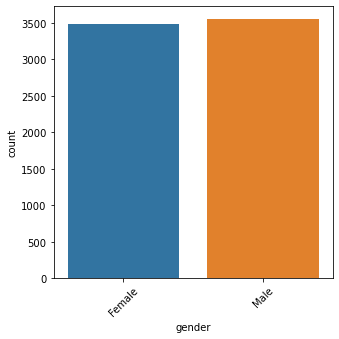

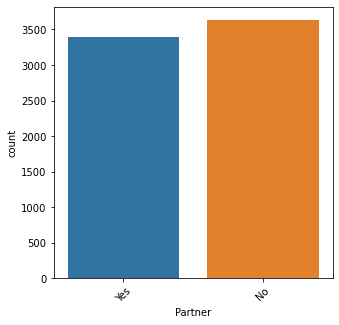

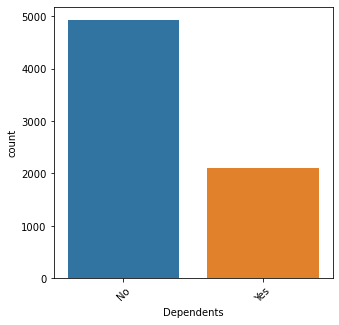

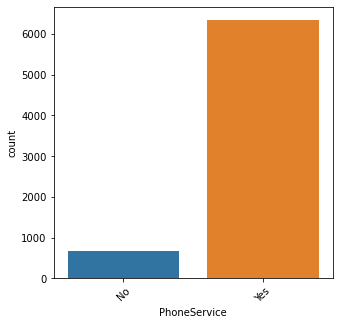

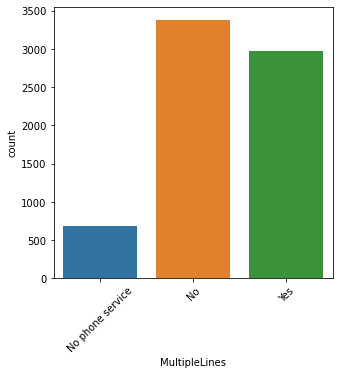

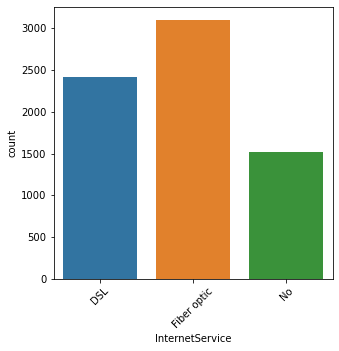

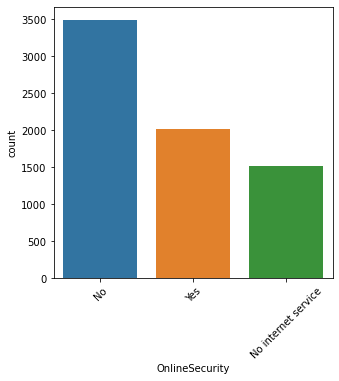

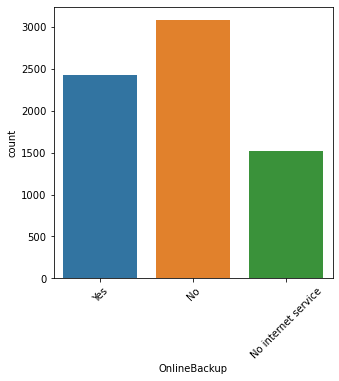

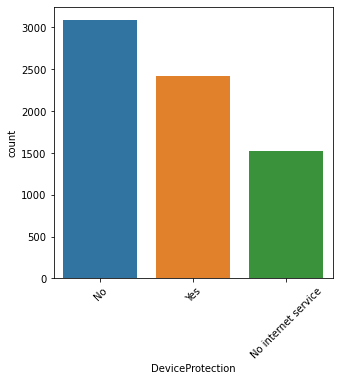

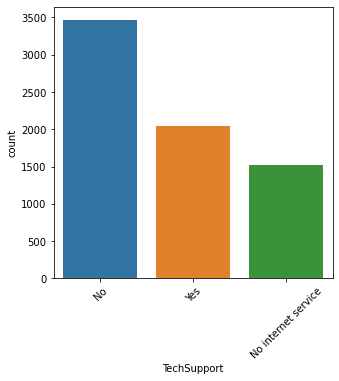

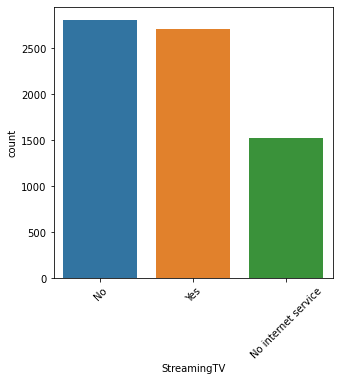

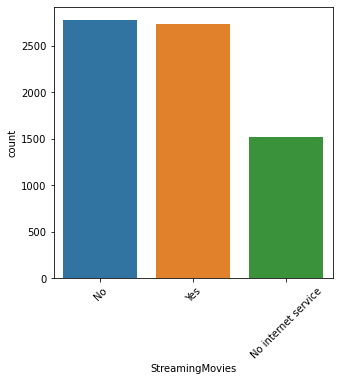

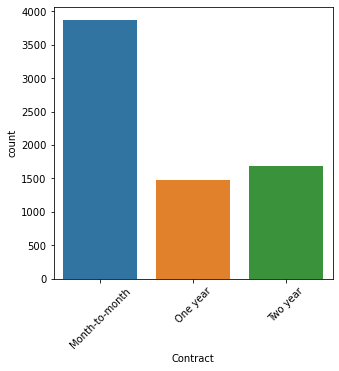

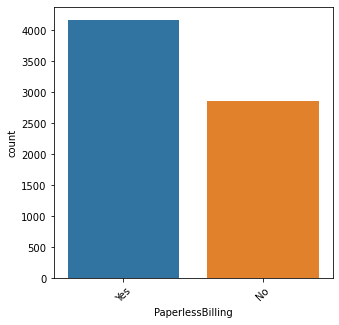

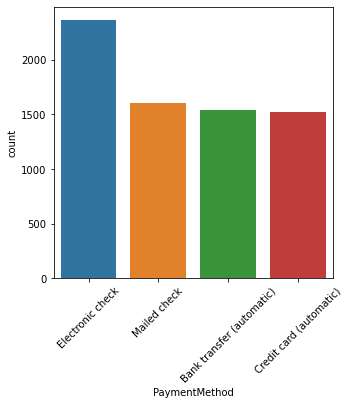

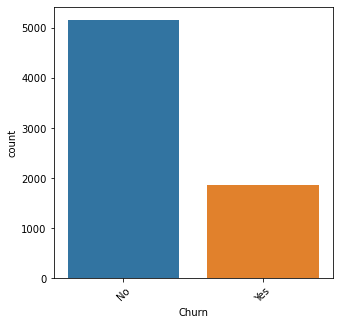

In [18]:
for i in col2:
    plt.figure(figsize=(5,5))
    sns.countplot(df_cat[i])
    plt.xlabel(i,fontsize=10)
    plt.xticks(rotation=45)
    plt.show()
    
#The database has more number of male than females.
#3600 customers do not have partners and 3400 customers have partners
#4800 customers do not have dependents and 2200 have dependents
#6300 customers have phone service and 700 customers do not have phone service
#2570 have multiple lines, 3400 do not have multiple lines, 600 have no phone service
#3200 customers have fiber optic internet service,2400 customers have DSL,1500 have no internet service
#3500 customers do not have online security, 2000 customers have online security,1480 customers have no internet service
#3200 customers do not have online backup,2400 customers have online backup, 1500 customer do not have internet service
#3100 customers do not have device protection, 2300 customers have device protection.
#3500 customers do not have tech support, 2000 customers have tech support
#2700 customers do have streaming tv, 2600 customers have streaming tv.
#3800 customers have month-to-month contract, 1400 customers have on-year contract and 1600 customers have 2-year contract
#4200 customers have paperless billing and 2700 customers do not have paperless billing
#2800 customers have electronic mode of payment, 1600 customers have mailed check, 1500 customers have bank transfer,1500 have credit card
#5200 customers are valued at no attrition and 1700 customers are values at positive attrition.

Continuous Columns

In [19]:
df_cont=data.select_dtypes(include=["int64","float64"])
col3=df_cont.columns.values

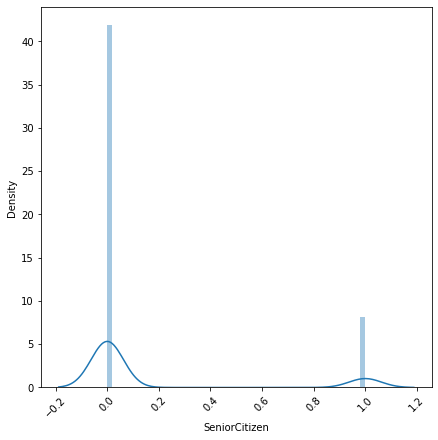

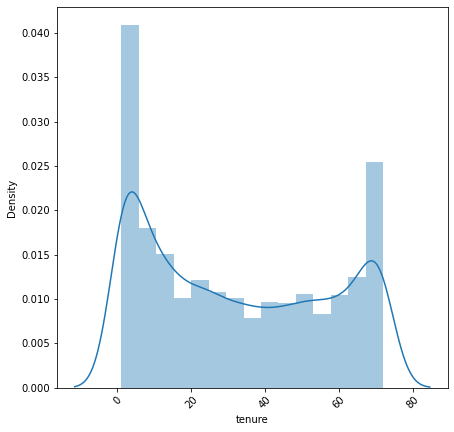

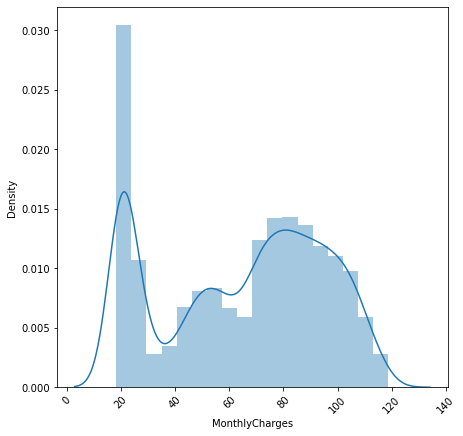

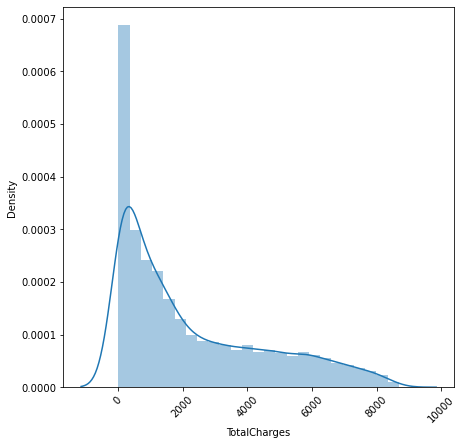

In [20]:
for i in col3:
    plt.figure(figsize=(7,7))
    sns.distplot(df_cont[i])
    plt.xlabel(i,fontsize=10)
    plt.xticks(rotation=45)
    plt.show()
    
#Tenure of the customers is ranging from 4 to 75,most of the customers have 4 years tenure.
#Monthly Charges ranging from 20 to 120.
#Total Charges ranging from 0 to 8000.

###### Bivariate Analysis

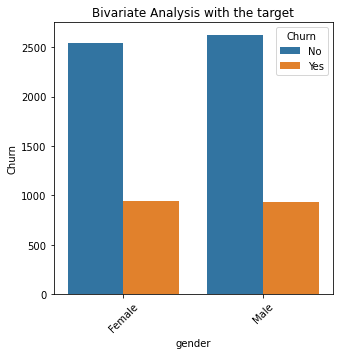

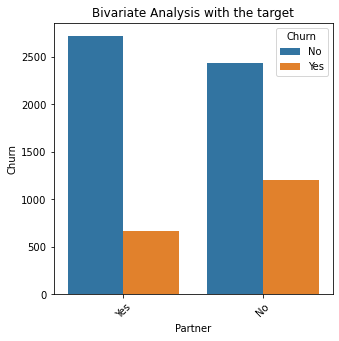

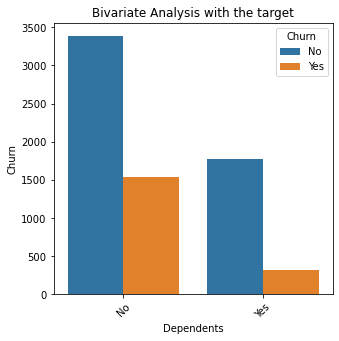

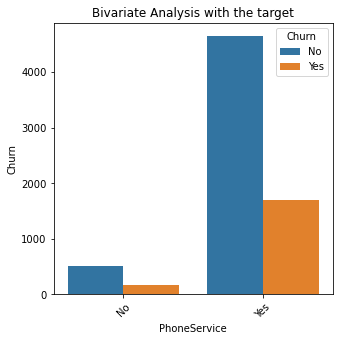

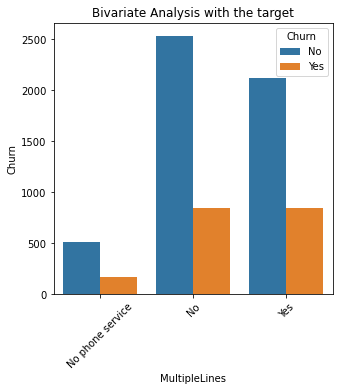

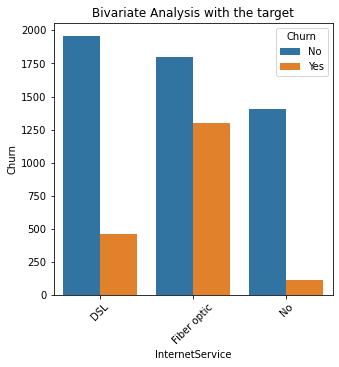

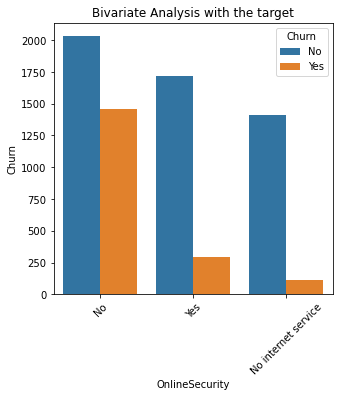

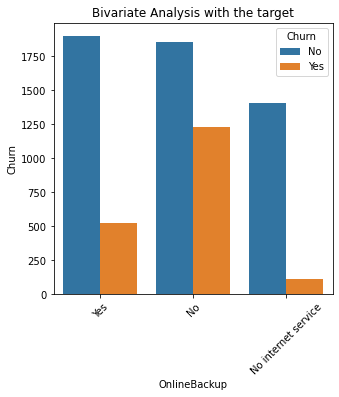

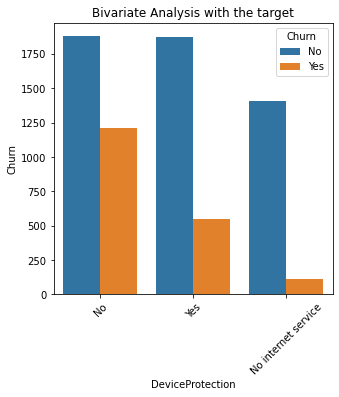

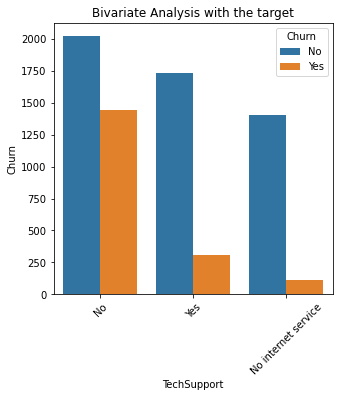

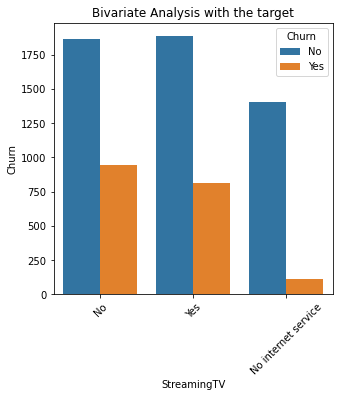

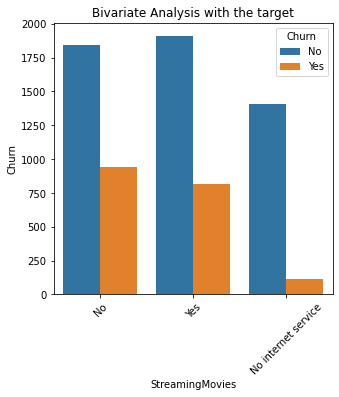

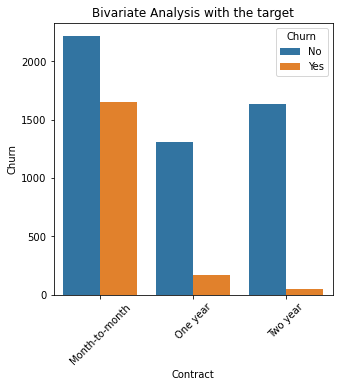

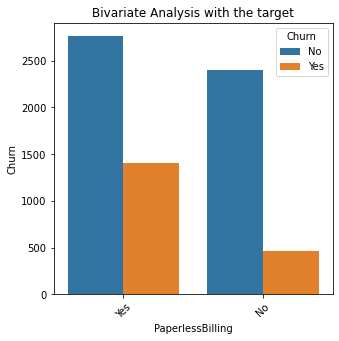

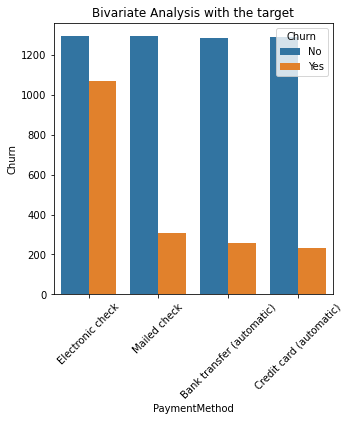

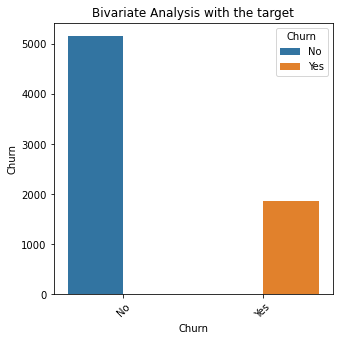

In [21]:
for i in col2:
    plt.figure(figsize=(5,5))
    sns.countplot(df_cat[i],hue=df_cat["Churn"])
    plt.xlabel(i)
    plt.ylabel("Churn")
    plt.title("Bivariate Analysis with the target")
    plt.xticks(rotation=45)
    plt.show()
    
#Male customers have more churn than females
#Customers with partners have less churn than customers without partners
#Customers who do not have dependents have more churn than customers who have dependents
#Customers with Phone Service have more churn than customers who do not have phone service
#Customers with fiber optic internet service have more churn than DSL and customers who do not have internet service
#Customers who do not have online security have more churn than customers who have online security.
#Customers with no online backup have more churn than customers with online backup.
#Customers with no device protection have more churn than customers with device protection.
#Customers who do not have tech support have more churn than customers who have tech support
#Customers who do not have TV Streaming have more churn than who don't have TV streaming.
#Month-to-month contract customers have more churn than one-year contract customers.
#Customers who have paperless billing have more churn who don't.
#Electronic check mode of payment has the highest churn



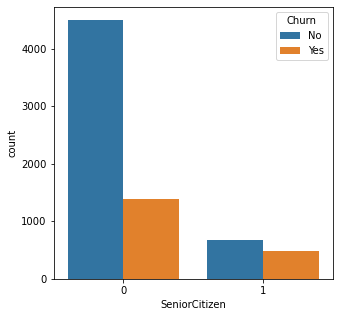

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data["SeniorCitizen"],hue=data["Churn"])
plt.show()

#Senior citizens have less churn than young age customers

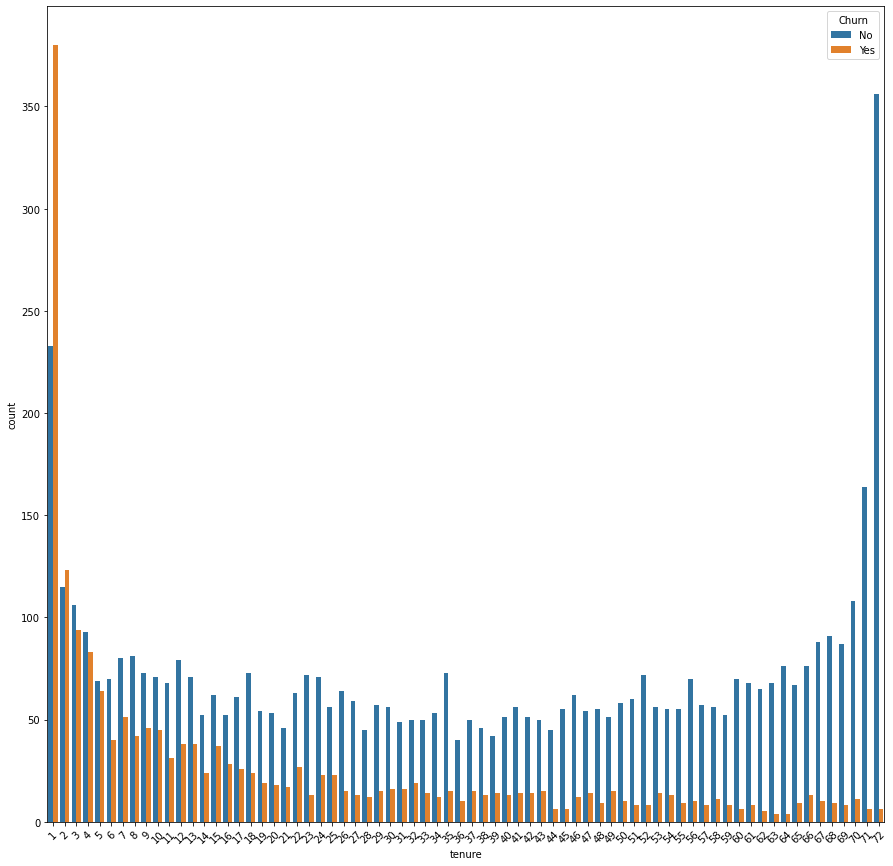

In [52]:
plt.figure(figsize=(15,15))
sns.countplot(data["tenure"],hue=data["Churn"])
plt.xticks(rotation=45)
plt.show()

#1 to 4 years tenure customers have more churn than higher tenure customers.


#### Encoding the categorical columns

In [18]:
dc=data.select_dtypes(include=["object"])
col_enc=dc.columns.values

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for i in col_enc:
    data[i]=le.fit_transform(data[i])

In [21]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


gender                 AxesSubplot(0.125,0.125;0.032563x0.755)
SeniorCitizen       AxesSubplot(0.164076,0.125;0.032563x0.755)
Partner             AxesSubplot(0.203151,0.125;0.032563x0.755)
Dependents          AxesSubplot(0.242227,0.125;0.032563x0.755)
tenure              AxesSubplot(0.281303,0.125;0.032563x0.755)
PhoneService        AxesSubplot(0.320378,0.125;0.032563x0.755)
MultipleLines       AxesSubplot(0.359454,0.125;0.032563x0.755)
InternetService     AxesSubplot(0.398529,0.125;0.032563x0.755)
OnlineSecurity      AxesSubplot(0.437605,0.125;0.032563x0.755)
OnlineBackup        AxesSubplot(0.476681,0.125;0.032563x0.755)
DeviceProtection    AxesSubplot(0.515756,0.125;0.032563x0.755)
TechSupport         AxesSubplot(0.554832,0.125;0.032563x0.755)
StreamingTV         AxesSubplot(0.593908,0.125;0.032563x0.755)
StreamingMovies     AxesSubplot(0.632983,0.125;0.032563x0.755)
Contract            AxesSubplot(0.672059,0.125;0.032563x0.755)
PaperlessBilling    AxesSubplot(0.711134,0.125;0.032563

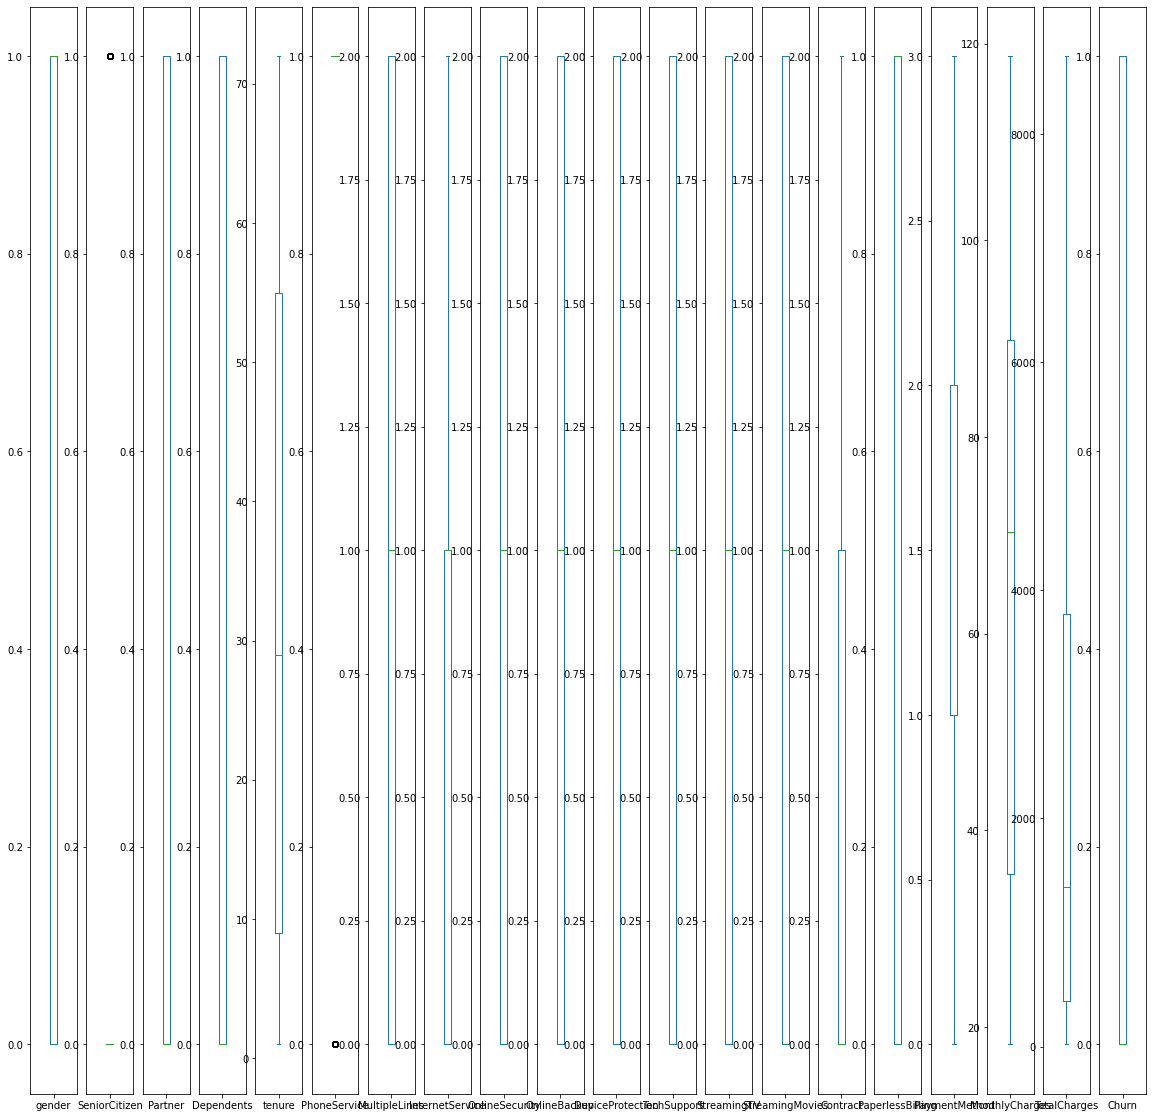

In [33]:
#Plotting box plot to check for outliers

data.plot(kind='box',subplots=True,figsize=(20,20))


In [123]:
data.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [23]:
data.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<AxesSubplot:>

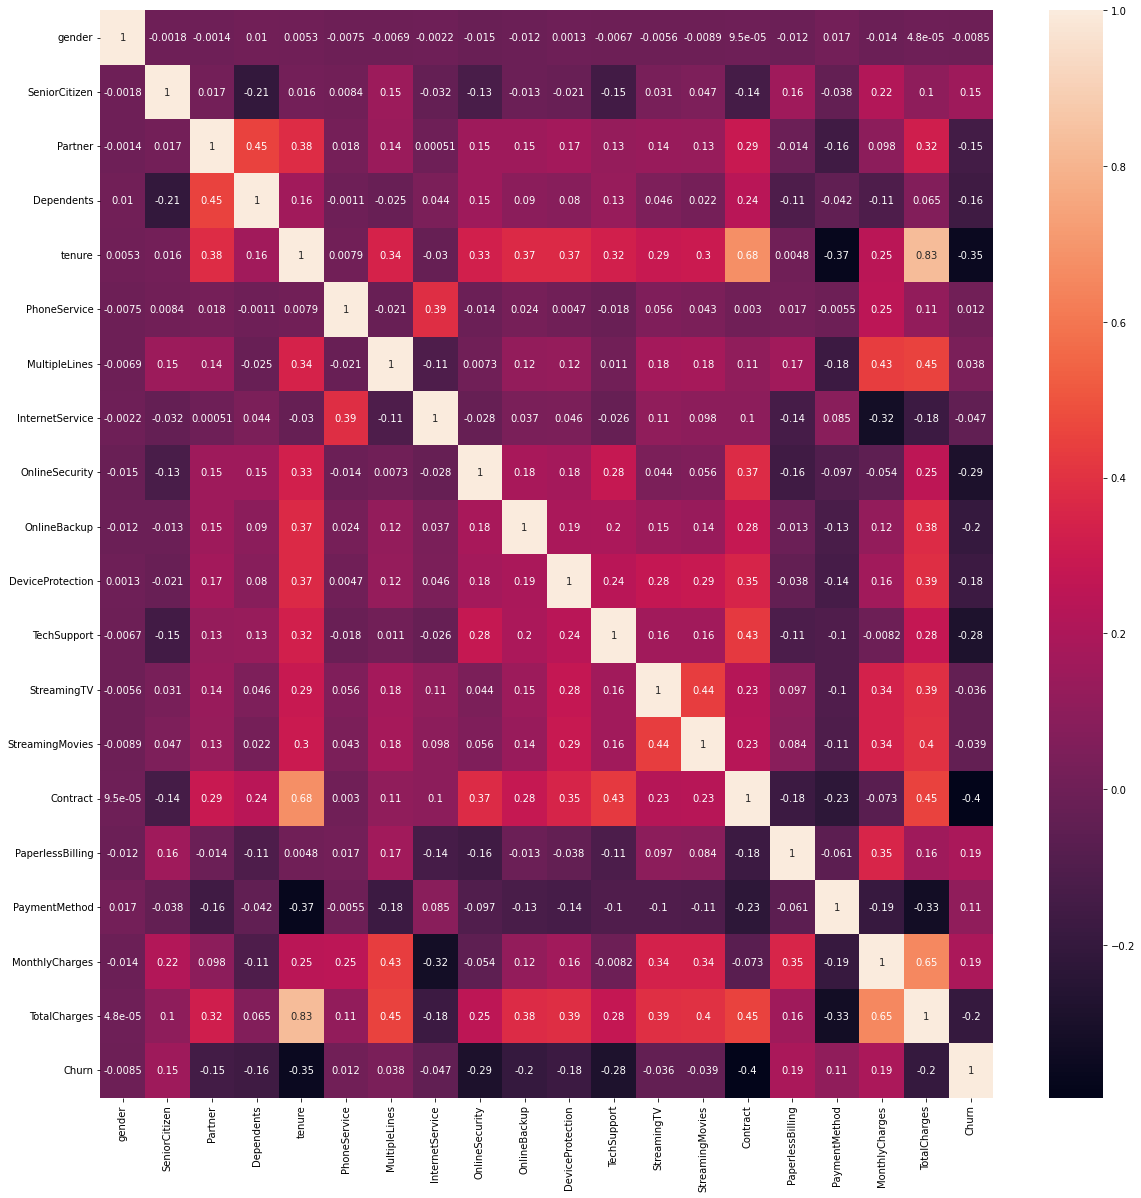

In [34]:
#Checking Correlation by plotting heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

#From the below heatmap, the main factors positively correlating with Churn are-MonthlyCharges,PaperlessBilling,SeniorCitizen,
#PaymentMethod

### Data Pre-Processing

In [24]:
#Checking Z-Score for Outliers
from scipy import stats
clist=data.columns.values
z1=abs(stats.zscore(data[clist]))

In [25]:
data_z=data[(z1 < 3).all(axis=1)]

In [26]:
data.shape,data_z.shape

((7032, 20), (6352, 20))

In [27]:
a=(data.shape[0]-data_z.shape[0])/data.shape[0]
print("Percentage loss of data after removing outliers",round(a*100,2))

Percentage loss of data after removing outliers 9.67


gender                 AxesSubplot(0.125,0.125;0.032563x0.755)
SeniorCitizen       AxesSubplot(0.164076,0.125;0.032563x0.755)
Partner             AxesSubplot(0.203151,0.125;0.032563x0.755)
Dependents          AxesSubplot(0.242227,0.125;0.032563x0.755)
tenure              AxesSubplot(0.281303,0.125;0.032563x0.755)
PhoneService        AxesSubplot(0.320378,0.125;0.032563x0.755)
MultipleLines       AxesSubplot(0.359454,0.125;0.032563x0.755)
InternetService     AxesSubplot(0.398529,0.125;0.032563x0.755)
OnlineSecurity      AxesSubplot(0.437605,0.125;0.032563x0.755)
OnlineBackup        AxesSubplot(0.476681,0.125;0.032563x0.755)
DeviceProtection    AxesSubplot(0.515756,0.125;0.032563x0.755)
TechSupport         AxesSubplot(0.554832,0.125;0.032563x0.755)
StreamingTV         AxesSubplot(0.593908,0.125;0.032563x0.755)
StreamingMovies     AxesSubplot(0.632983,0.125;0.032563x0.755)
Contract            AxesSubplot(0.672059,0.125;0.032563x0.755)
PaperlessBilling    AxesSubplot(0.711134,0.125;0.032563

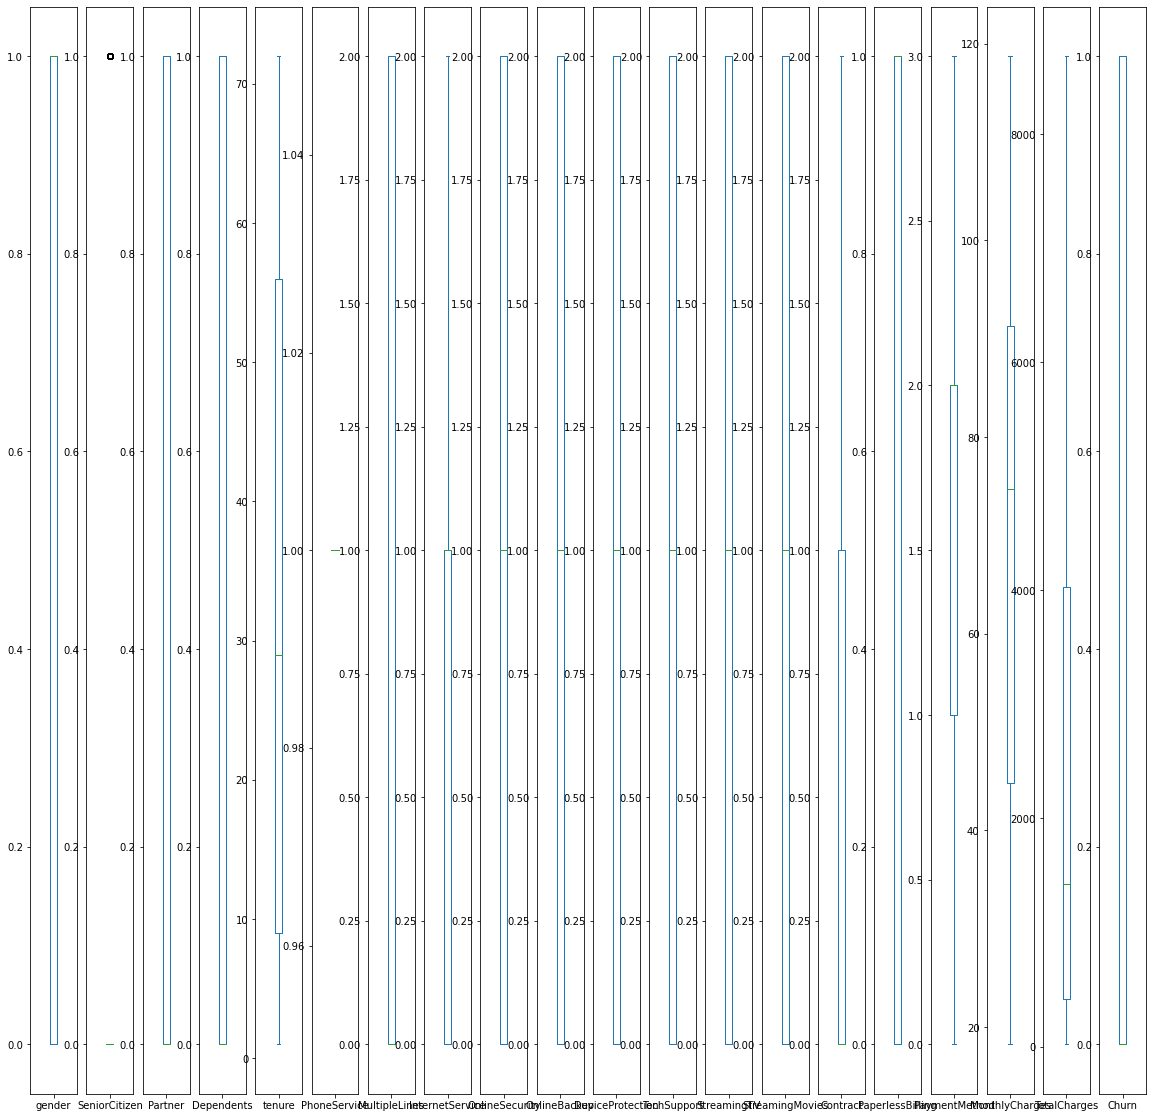

In [128]:
#plotting data after removing outliers
data_z.plot(kind='box',subplots=True,figsize=(20,20))

### Balancing the taret variable

In [28]:
data_z["Churn"].value_counts()

0    4653
1    1699
Name: Churn, dtype: int64

In [29]:
from sklearn.utils import resample
dfminor_output=data_z[(data_z["Churn"]==1)]
dfmajor_output=data_z[(data_z["Churn"]==0)]
dfmin_up=resample(dfminor_output,replace=True,n_samples=4653,random_state=42)
df_up=pd.concat([dfmin_up,dfmajor_output])

In [30]:
df_up["Churn"].value_counts()

1    4653
0    4653
Name: Churn, dtype: int64

# Splitting target and feature

In [31]:
dfnew=df_up.copy()

In [32]:
X=dfnew.drop("Churn",axis=1)
Y=dfnew[["Churn"]]

In [134]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4698,0,1,1,0,66,1,2,0,0,2,2,0,2,2,2,1,0,80.55,5265.10
6082,0,0,1,0,59,1,2,1,0,2,0,0,2,2,0,0,2,101.10,6039.90
3587,1,1,0,0,9,1,2,1,0,2,0,0,2,2,0,1,1,99.45,919.40
5414,1,0,0,0,64,1,2,1,0,2,0,2,2,2,1,1,1,105.65,6903.10
4721,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.25,20.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,0,0,0,19,1,0,1,0,0,0,0,2,0,0,1,0,78.70,1495.10
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90


In [107]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 4698 to 7042
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Churn   9306 non-null   int32
dtypes: int32(1)
memory usage: 109.1 KB


In [33]:
#Checking the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

             feature        VIF
0             gender   1.004671
1      SeniorCitizen   1.158976
2            Partner   1.463827
3         Dependents   1.389970
4             tenure   9.342589
5       PhoneService  38.599117
6      MultipleLines   1.424216
7    InternetService   1.439796
8     OnlineSecurity   1.282644
9       OnlineBackup   1.229936
10  DeviceProtection   1.291436
11       TechSupport   1.377166
12       StreamingTV   1.457939
13   StreamingMovies   1.457783
14          Contract   2.574703
15  PaperlessBilling   1.212347
16     PaymentMethod   1.177999
17    MonthlyCharges   4.251456
18      TotalCharges  11.487916


In [34]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(X)

X_s=pd.DataFrame(x,columns=X.columns)

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [36]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()

lst=[lr,rf,kn,sv,dt,gb]

In [41]:
model=[]
rs=[]
acc_train=[]
acc_test=[]
f1_train=[]
f1_test=[]

        

In [42]:
for i1 in lst:
    for i2 in range(0,5):
        x_train,x_test,y_train,y_test=train_test_split(X_s,Y,random_state=i2,test_size=0.20)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        model.append(i1)
        rs.append(i2)
        acc_train.append(round(accuracy_score(y_train,pred_train),2))
        acc_test.append(round(accuracy_score(y_test,pred_test),2))
        f1_train.append(round(f1_score(y_train,pred_train),2))
        f1_test.append(round(f1_score(y_test,pred_test),2))

In [43]:
#Creating Dataframe of comparison between different models and their respective scores

modeldata=pd.DataFrame({"Model":model,"Random State":rs,"Accuracy Score-Train":acc_train,"Accuracy Score-Test":acc_test,"F1 Score-train":f1_train,"F1 Score-test":f1_test})
modeldata  

,Model,Random State,Accuracy Score-Train,Accuracy Score-Test,F1 Score-train,F1 Score-test
0,LogisticRegression(),0,0.77,0.76,0.78,0.78
1,LogisticRegression(),1,0.77,0.76,0.78,0.77
2,LogisticRegression(),2,0.77,0.76,0.78,0.78
3,LogisticRegression(),3,0.77,0.78,0.78,0.78
4,LogisticRegression(),4,0.77,0.78,0.78,0.79
5,"(DecisionTreeClassifier(max_features='auto', r...",0,1.00,0.91,1.00,0.91
6,"(DecisionTreeClassifier(max_features='auto', r...",1,1.00,0.90,1.00,0.91
7,"(DecisionTreeClassifier(max_features='auto', r...",2,1.00,0.90,1.00,0.91
8,"(DecisionTreeClassifier(max_features='auto', r...",3,1.00,0.91,1.00,0.91
9,"(DecisionTreeClassifier(max_features='auto', r...",4,1.00,0.90,1.00,0.91


From the above results, the Random Forest model is an efficient one with training accuracy score of 100% and testing accuracy of 91%.

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X_s,Y,random_state=3,test_size=0.20)

### Logistic Regression 

In [45]:
m1=lr.fit(x_train,y_train)
pred_train=m1.predict(x_train)
pred_test=m1.predict(x_test)

In [46]:
print(round(accuracy_score(y_train,pred_train),2)*100)

77.0


In [47]:
print(round(accuracy_score(y_test,pred_test),2)*100)

78.0


In [48]:
print(round(f1_score(y_train,pred_train),2)*100)

78.0


In [49]:
print(round(f1_score(y_test,pred_test),2)*100)

78.0


In [50]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       950
           1       0.75      0.81      0.78       912

    accuracy                           0.78      1862
   macro avg       0.78      0.78      0.78      1862
weighted avg       0.78      0.78      0.78      1862



In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [52]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)

In [53]:
cv1=cross_val_score(m1,X_s,Y, scoring='accuracy', cv=cv)

In [54]:
print(round(cv1.mean(),2)*100)

77.0


# Random Forest Classifier

In [55]:
m2=rf.fit(x_train,y_train)
pred_train=m2.predict(x_train)
pred_test=m2.predict(x_test)

In [56]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [57]:
print(round(accuracy_score(y_test,pred_test),2)*100)

91.0


In [58]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [59]:
print(round(f1_score(y_test,pred_test),2)*100)

91.0


In [60]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       950
           1       0.87      0.96      0.91       912

    accuracy                           0.91      1862
   macro avg       0.91      0.91      0.91      1862
weighted avg       0.91      0.91      0.91      1862



In [61]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m2,X_s,Y, scoring='accuracy', cv=cv)

In [62]:
print(round(cv1.mean(),2)*100)

91.0


In [63]:
print(confusion_matrix(y_test,pred_test))

[[820 130]
 [ 38 874]]


# KNeighbors Classifier

In [64]:
m3=kn.fit(x_train,y_train)
pred_train=m3.predict(x_train)
pred_test=m3.predict(x_test)

In [65]:
print(round(accuracy_score(y_train,pred_train),2)*100)

89.0


In [66]:
print(round(accuracy_score(y_test,pred_test),2)*100)

78.0


In [67]:
print(round(f1_score(y_train,pred_train),2)*100)

90.0


In [68]:
print(round(f1_score(y_test,pred_test),2)*100)

80.0


In [69]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.69      0.77       950
           1       0.73      0.88      0.80       912

    accuracy                           0.78      1862
   macro avg       0.79      0.79      0.78      1862
weighted avg       0.80      0.78      0.78      1862



In [70]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m3,X_s,Y, scoring='accuracy', cv=cv)

In [71]:
print(round(cv1.mean(),2)*100)

80.0


# SVC

In [72]:
m4=sv.fit(x_train,y_train)
pred_train=m4.predict(x_train)
pred_test=m4.predict(x_test)

In [73]:
print(round(accuracy_score(y_train,pred_train),2)*100)

81.0


In [74]:
print(round(accuracy_score(y_test,pred_test),2)*100)

79.0


In [75]:
print(round(f1_score(y_train,pred_train),2)*100)

82.0


In [76]:
print(round(f1_score(y_test,pred_test),2)*100)

80.0


In [77]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       950
           1       0.76      0.84      0.80       912

    accuracy                           0.79      1862
   macro avg       0.79      0.79      0.79      1862
weighted avg       0.80      0.79      0.79      1862



In [78]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m4,X_s,Y, scoring='accuracy', cv=cv)

In [79]:
print(round(cv1.mean(),2)*100)

78.0


# Decision Tree Classifier

In [80]:
m5=dt.fit(x_train,y_train)
pred_train=m5.predict(x_train)
pred_test=m5.predict(x_test)

In [81]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [82]:
print(round(accuracy_score(y_test,pred_test),2)*100)

87.0


In [83]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [84]:
print(round(f1_score(y_test,pred_test),2)*100)

88.0


In [85]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       950
           1       0.82      0.95      0.88       912

    accuracy                           0.87      1862
   macro avg       0.88      0.87      0.87      1862
weighted avg       0.88      0.87      0.87      1862



In [86]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m5,X_s,Y, scoring='accuracy', cv=cv)

In [87]:
print(round(cv1.mean(),2)*100)

89.0


# Gaussian NB

In [88]:
m6=gb.fit(x_train,y_train)
pred_train=m6.predict(x_train)
pred_test=m4.predict(x_test)

In [89]:
print(round(accuracy_score(y_train,pred_train),2)*100)

75.0


In [90]:
print(round(accuracy_score(y_test,pred_test),2)*100)

79.0


In [91]:
print(round(f1_score(y_train,pred_train),2)*100)

76.0


In [92]:
print(round(f1_score(y_test,pred_test),2)*100)

80.0


In [93]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       950
           1       0.76      0.84      0.80       912

    accuracy                           0.79      1862
   macro avg       0.79      0.79      0.79      1862
weighted avg       0.80      0.79      0.79      1862



In [94]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m6,X_s,Y, scoring='accuracy', cv=cv)

In [95]:
print(round(cv1.mean(),2)*100)

75.0


# Hyperparameter Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
rf=RandomForestClassifier()

In [100]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [257]:
param_dist={"max_depth": [20,30,40,50,60,70,80],
            "criterion": ["gini", "entropy","log_loss"],
           "class_weight":["balanced","balanced_subsample"],
           "n_jobs":[1,2,3,4]}

In [258]:
samples=7  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=3)

In [259]:
final=randomCV.fit(x_train,y_train)

In [260]:
print(final.best_params_)

{'n_jobs': 4, 'max_depth': 80, 'criterion': 'gini', 'class_weight': 'balanced'}


In [261]:
pred1=final.predict(x_test)

In [262]:
pred2=final.predict(x_train)

In [263]:
print(round(accuracy_score(y_train,pred2),2)*100)

100.0


In [264]:
print(round(accuracy_score(y_test,pred1),2)*100)

90.0


In [265]:
print(round(f1_score(y_train,pred2),2)*100)

100.0


In [266]:
print(round(f1_score(y_test,pred1),2)*100)

91.0


In [267]:
print(confusion_matrix(y_test,pred1))

[[811 139]
 [ 39 873]]


# Saving the model

In [168]:
import pickle
pickle.dump(final, open('Churn', 'wb'))

In [ ]:
pickled_model=pickle.load(open('Churn', 'rb'))
pickled_model.predict(x_test)